# Multiple Particle Tracking
-----------------
This code is obtained from DeepTrack2 library notebooks: https://github.com/softmatterlab/DeepTrack2

**Adapted by:** Juan C. Peña and Eberto Benjumea

In [17]:
%matplotlib inline
!pip install deeptrack

In [18]:
import deeptrack as dt
import numpy as np
import skimage.color
import matplotlib.pyplot as plt

# SETUP

In [19]:
n = 2 # Number of train image
m = 3 # Number of test image

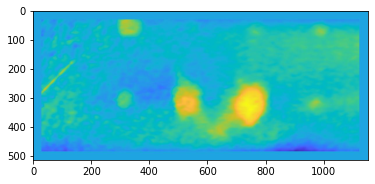

In [20]:
import cv2
# Preprocessing
image = dt.LoadImage(f'../input/wheals-data/Data/jpg/train/images/{n}.jpg')()._value / 256
# plt.imshow(image)
plt.imshow(image, cmap='gray')

(77, 173)


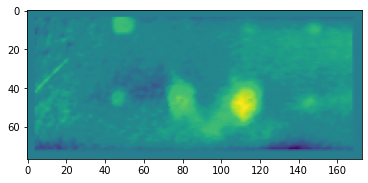

In [21]:
gray_image = 0.21*image[:,:,0] + 0.72*image[:,:,1] + 0.07*image[:,:,2] # Convert to grayscale manually

# Resizing
resized_image = cv2.resize(gray_image, (0, 0), fx=0.15, fy=0.15)
plt.imshow(resized_image)
print(resized_image.shape)
#plt.axis("off")

(40, 40, 1)


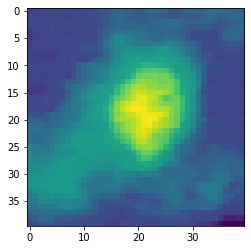

In [22]:
# Cropping
t, x, y, w = (251, 90, 30, 40)
crop = resize_image[y:y+w, x:x+w]
training_image = np.expand_dims(crop, axis = 2) # Add a third channel
print(training_image.shape)
plt.imshow(training_image)
#plt.axis("off")

In [24]:
model = dt.models.LodeSTAR(input_shape=(None, None, 1))

# Saving weights - JP
model.save_weights('./model.h5')

train_set =   (
    dt.Value(training_image)
    >> dt.Add(lambda: np.random.randn() * 0.1)
    >> dt.Gaussian(sigma=lambda:np.random.uniform(0, 0.2))  
    >> dt.Multiply(lambda: np.random.uniform(0.6, 1.2))
)
# model.model.consistency_weight = X
model.fit(
    train_set,
    epochs=40,
    batch_size=8,
)

Generating 162 / 160 samples before starting training
Epoch 1/40
162/162 [==============================] - 12s 19ms/step - total_loss: 3.0314 - consistency_loss: 1.5171
Epoch 2/40
162/162 [==============================] - 3s 16ms/step - total_loss: 2.9955 - consistency_loss: 1.4672
Epoch 3/40
162/162 [==============================] - 3s 18ms/step - total_loss: 2.5336 - consistency_loss: 1.2816
Epoch 4/40
162/162 [==============================] - 2s 15ms/step - total_loss: 1.9807 - consistency_loss: 0.9716
Epoch 5/40
162/162 [==============================] - 3s 17ms/step - total_loss: 1.2598 - consistency_loss: 0.7364
Epoch 6/40
162/162 [==============================] - 3s 16ms/step - total_loss: 1.1028 - consistency_loss: 0.6798
Epoch 7/40
162/162 [==============================] - 2s 15ms/step - total_loss: 0.9734 - consistency_loss: 0.6118
Epoch 8/40
162/162 [==============================] - 2s 11ms/step - total_loss: 0.7710 - consistency_loss: 0.4979
Epoch 9/40
162/162 [=====

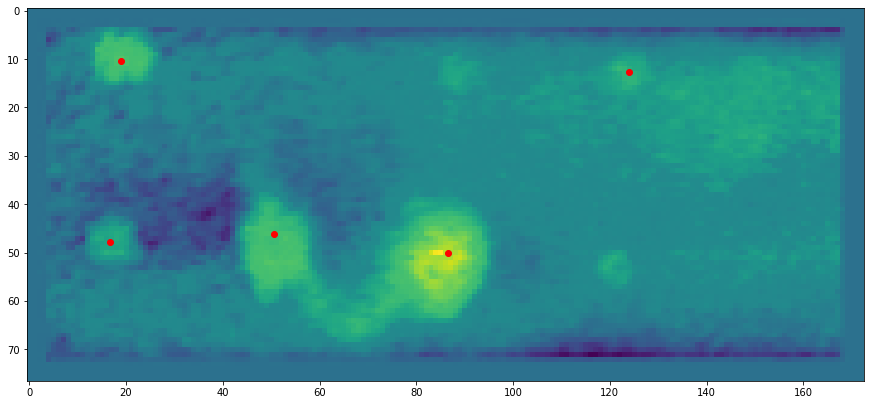

In [27]:
#May need to tune these to get optimal performance!
alpha = 0.2
cutoff = 0.99

image2 = dt.LoadImage(f'../input/wheals-data/Data/jpg/train/images/{m}.jpg')()._value / 256
gray_image2 = 0.21*image2[:,:,0] + 0.72*image2[:,:,1] + 0.07*image2[:,:,2] # Convert to grayscale manually
resized_image2 = cv2.resize(gray_image2, (0, 0), fx=0.15, fy=0.15)
test_image = np.expand_dims(resized_image2, axis = 2) # Add a third channel

detections = model.predict_and_detect(test_image[np.newaxis], alpha=alpha, beta=1-alpha, cutoff=cutoff, mode="quantile")[0]
# detections = autotracker.detect(pred[0], weights[0], beta=1-alpha, alpha=alpha, cutoff=cutoff, mode="constant")

plt.figure(figsize=(15, 15))
plt.imshow(test_image)
#plt.axis("off")
plt.scatter(detections[:, 1], detections[:, 0], color="r")

In [ ]:
# Evaluate the model
# loss, acc = model.evaluate(test_images, test_labels, verbose=2)